In [1]:
# Esta parte es para los temas que utilizo así que comentelos
from jupyterthemes import jtplot
jtplot.style()

In [2]:
from libMLP import generateSets
from libMLP import modMLP
from libMLP import fitMLP
from libMLP import sMAPE
from libMLP import mAPE
from libMLP import graphPrediction
from libMLP import plotHistory
from libMLP import trainNoise
import numpy as np
import pandas as pd
from tensorflow import set_random_seed
np.random.seed(42)
set_random_seed(42)

Using TensorFlow backend.


In [3]:
import os
comando = "PowerShell -Command \"Add-Type -AssemblyName System.Speech; (New-Object System.Speech.Synthesis.SpeechSynthesizer).Speak('Ya termine de entrenar');\" "

In [4]:
m = 13
vari = 1.05689349
media = 1.09712885

## Lectura de datos

In [5]:
#matrizDiseño = pd.read_csv('MatDis/1_temperature_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/2_temperature_subsampled_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/3_passengers_Matrix.csv') 
#matrizDiseño = pd.read_csv('MatDis/4_irradiance_Matrix.csv') 
#matrizDiseño = pd.read_csv('MatDis/5_irradiance_subsampled_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/6_sunspots_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/7_distribution_subsampled_norm_Matrix.csv')
matrizDiseño = pd.read_csv('MatDis/8_active_power_Matrix.csv')
matrizDiseño.shape

(34102, 14)

## División y estandarización de datos

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test=generateSets(matrizDiseño, 0.3, 0.2)

## Ruido (en las pruebas que sea necesario)

In [7]:
X_train_e, y_train_e = trainNoise(X_train.copy(), y_train.copy(), 10, 13)

## MLP

In [8]:
neuronas = [128,256, 512, 512, 256, 128]   # Número de neuronas por capa
activations = ['relu', 'relu', 'relu', 'relu', 'relu', 'sigmoid'] # funciónes de activación de cada capa

model = modMLP(neuronas, activations, m)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "forecasting"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
________________________________________

## Entrenamiento

In [15]:
%%time
history = fitMLP(model, X_train, y_train, X_val, y_val, X_test, y_test, 40)
os.system(comando)

Train on 19096 samples, validate on 4775 samples
Epoch 1/40
19096/19096 [==============================] - 4s 207us/sample - loss: 0.1335 - mean_absolute_error: 0.2476 - mean_squared_error: 0.1335 - val_loss: 1.0521 - val_mean_absolute_error: 0.6888 - val_mean_squared_error: 1.0521
Epoch 2/40
19096/19096 [==============================] - 4s 205us/sample - loss: 0.1222 - mean_absolute_error: 0.2358 - mean_squared_error: 0.1222 - val_loss: 1.1078 - val_mean_absolute_error: 0.7169 - val_mean_squared_error: 1.1078
Epoch 3/40
19096/19096 [==============================] - 4s 210us/sample - loss: 0.1268 - mean_absolute_error: 0.2315 - mean_squared_error: 0.1268 - val_loss: 1.1042 - val_mean_absolute_error: 0.7083 - val_mean_squared_error: 1.1042
Epoch 4/40
19096/19096 [==============================] - 4s 211us/sample - loss: 0.1188 - mean_absolute_error: 0.2294 - mean_squared_error: 0.1188 - val_loss: 1.0692 - val_mean_absolute_error: 0.7017 - val_mean_squared_error: 1.0692
Epoch 5/40
1909

Epoch 36/40
19096/19096 [==============================] - 4s 199us/sample - loss: 0.0272 - mean_absolute_error: 0.0936 - mean_squared_error: 0.0272 - val_loss: 1.0659 - val_mean_absolute_error: 0.6964 - val_mean_squared_error: 1.0659
Epoch 37/40
19096/19096 [==============================] - 4s 201us/sample - loss: 0.0292 - mean_absolute_error: 0.0982 - mean_squared_error: 0.0292 - val_loss: 1.0592 - val_mean_absolute_error: 0.6928 - val_mean_squared_error: 1.0592
Epoch 38/40
19096/19096 [==============================] - 4s 199us/sample - loss: 0.0452 - mean_absolute_error: 0.1262 - mean_squared_error: 0.0452 - val_loss: 1.0829 - val_mean_absolute_error: 0.7044 - val_mean_squared_error: 1.0829
Epoch 39/40
19096/19096 [==============================] - 4s 202us/sample - loss: 0.0607 - mean_absolute_error: 0.1560 - mean_squared_error: 0.0607 - val_loss: 1.1031 - val_mean_absolute_error: 0.7100 - val_mean_squared_error: 1.1031
Epoch 40/40
10231/10231 [==============================] - 1

0

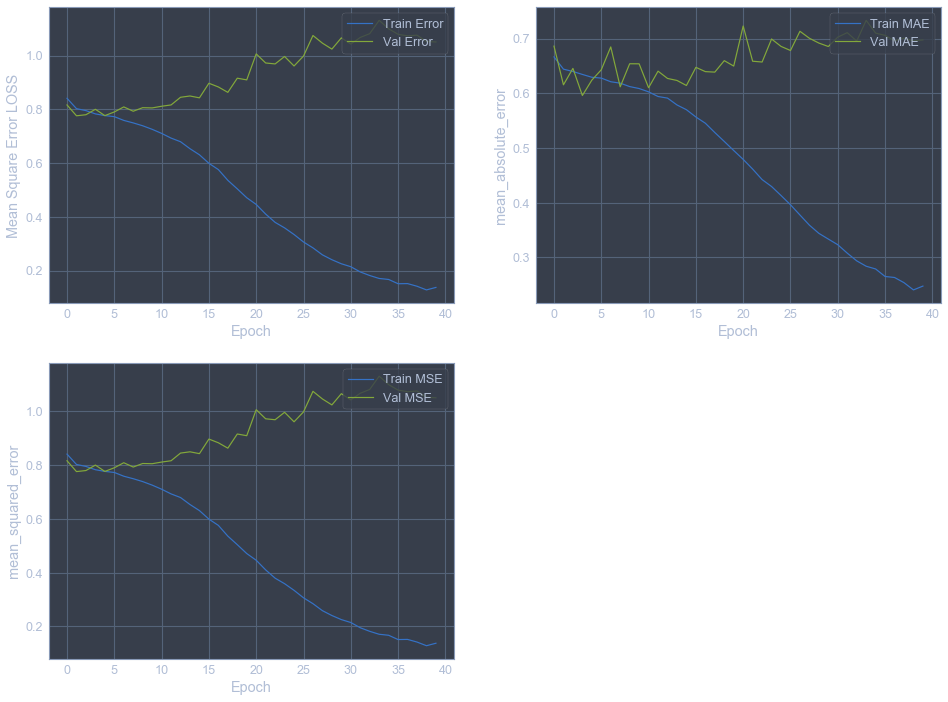

In [10]:
plotHistory(history)

## Predicción

In [11]:
y_predic= model.predict(X_test)

y_p = y_predic * vari + media
y_t = y_test * vari + media

#y_p = scaler.inverse_transform(y_predic)
#y_t = scaler.inverse_transform(y_test)
#y_p.min()


In [12]:
print("SMAPE: ",sMAPE(y_t, y_p))
print("MAPE: ",mAPE(y_t, y_p))

SMAPE:  33.55116098487506
MAPE:  89.00869577254812


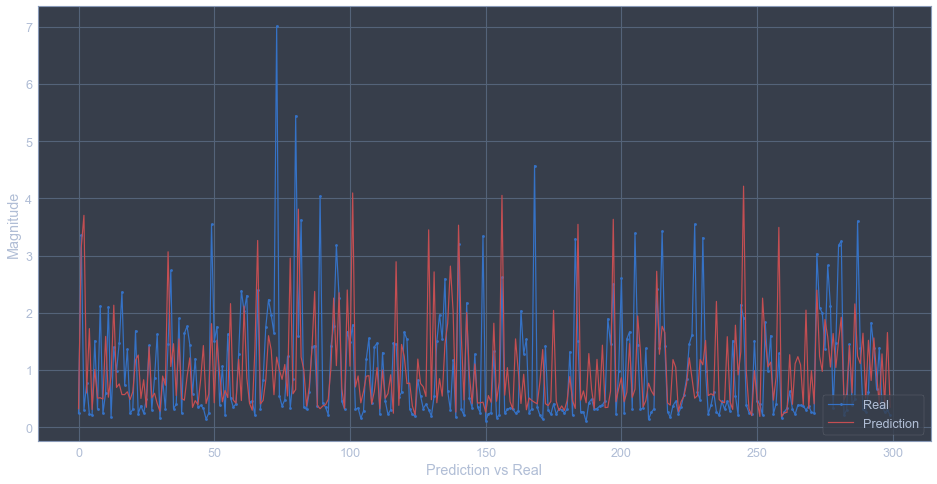

In [13]:
graphPrediction(y_t, y_p, 300)

In [14]:
model.save('modelo.h5')